In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as sktext
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as matrics
import seaborn as sns
%matplotlib inline

In [2]:
'''Reading dataset'''
news_df = pd.read_csv("data/uci-news-aggregator.csv")

In [3]:
'''
    * News Category:
        - b: Business
        - t: Science and Technology
        - e: Entertainment
        - m: Health
'''
news_df['CATEGORY'] = news_df['CATEGORY'].map({ 'b': 1, 't': 2, 'e': 3, 'm': 4 })
news_df['TITLE'] = news_df['TITLE'].map(lambda x: x.lower())

In [4]:
'''
    * Splitting dataset.
'''
X = news_df['TITLE']
y = news_df['CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [5]:
'''
    * Applying bag-of-words to the observations.
'''
countVect = sktext.CountVectorizer(stop_words='english')
X_train_vectorized = countVect.fit_transform(X_train)
testing_data  = countVect.transform(X_test)

In [6]:
'''
    * Traing...
'''
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
'''
    * Evaluation
'''
predictions = naive_bayes.predict(testing_data)

print("Accuracy : ", matrics.accuracy_score(y_test, predictions))
print("Recall : ", matrics.recall_score(y_test, predictions, average = 'weighted'))
print("Precision : ", matrics.precision_score(y_test, predictions, average = 'weighted'))
print("F1 : ", matrics.f1_score(y_test, predictions, average = 'weighted'))

Accuracy :  0.9307229771317646
Recall :  0.9307229771317646
Precision :  0.9308031753969921
F1 :  0.9307544522684279


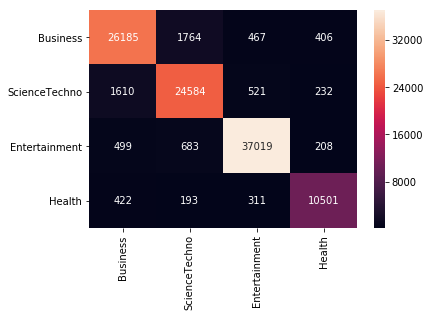

In [13]:
confusion_mat = matrics.confusion_matrix(y_test, predictions)
lables = ['Business', 'ScienceTechno', 'Entertainment', 'Health']
sns.heatmap(confusion_mat, xticklabels=lables, yticklabels=lables, annot=True, fmt="d")